In [38]:
# the basic imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
# but also reporting on the model
from sklearn.metrics import classification_report, confusion_matrix
# and a couple of utilities
from sklearn.utils import resample

In [39]:
# load data, extract just the features, and just the labels
wine_data = pd.read_csv("./WineQT.csv", delimiter=",")
wine_features = wine_data.drop("quality", axis=1).drop("Id", axis=1)
wine_labels = np.ravel(wine_data['quality'])

In [63]:
# split the dataset into train and test subsets
# note, while it may be tempting to get creative with variable names, such as
# features_train, features_test, labels_train, labels_test...
# it's WAY TOO MUCH typing, and most examples use x for features (as in, input
# data) and y for labels (as in, result)
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(wine_features, wine_labels, test_size=0.2, random_state=50)

In [64]:
print("train:", len(x_train), "test:", len(x_test))

train: 914 test: 229


In [65]:
print("sample:", resample(x_train, n_samples=5))

sample:       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
309             7.0              0.62         0.18             1.5      0.062   
258            12.5              0.46         0.63             2.0      0.071   
1122            6.4              0.36         0.53             2.2      0.230   
378            10.0              0.48         0.24             2.7      0.102   
712             8.0              0.58         0.16             2.0      0.120   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
309                   7.0                  50.0  0.99510  3.08       0.60   
258                   6.0                  15.0  0.99880  2.99       0.87   
1122                 19.0                  35.0  0.99340  3.37       0.93   
378                  13.0                  32.0  1.00000  3.28       0.56   
712                   3.0                   7.0  0.99454  3.22       0.58   

      alcohol  
309       9.3  
258      1

In [66]:
# normalise the data (meaning spread it ALL out on a scale between a..b)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [67]:
print("normalised sample:", resample(x_train, n_samples=5))

normalised sample: [[ 0.03113943  1.24584416 -0.83529885 -0.48591162  0.09791733  0.05205639
   0.53090333 -0.12485948 -0.76774246  1.02627829 -0.80008014]
 [ 0.31293584 -1.00062031  0.65403462  0.86207888  0.55581673 -0.34777171
  -0.684197   -0.64140864 -0.5136124   0.27501217  1.41492055]
 [-0.53245339  0.42119264 -0.06495395 -0.3273245  -0.06234746  0.15201342
   1.40328305 -0.29874731 -0.13241733 -0.60146497 -0.61549675]
 [-0.41973482 -0.14753254  0.08911503 -0.16873739  0.00633745 -1.0474709
  -0.99576119 -0.881783    0.05818021 -0.22583191  0.95346207]
 [-0.30701626  0.67711897 -1.40021845  2.36865649  0.00633745 -1.0474709
  -0.87113551  0.94915362  0.56644031 -0.66407048 -0.80008014]]


In [68]:
# train the SVC model
print("**** TESTING C-Support Vector Classification ****")

from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(x_train, y_train)

# now test the fitness with the test subset
svc_y_predict = svc_model.predict(x_test)

# visualise it
print("x: predictions, y: labels")
svc_cm = np.array(confusion_matrix(y_test, svc_y_predict, labels=[0,1,2,3,4,5,6,7,8,9,10]))
svc_conf_matrix = pd.DataFrame(svc_cm)
print(svc_conf_matrix)

**** TESTING C-Support Vector Classification ****
x: predictions, y: labels
    0   1   2   3   4   5   6   7   8   9   10
0    0   0   0   0   0   0   0   0   0   0   0
1    0   0   0   0   0   0   0   0   0   0   0
2    0   0   0   0   0   0   0   0   0   0   0
3    0   0   0   0   0   2   0   0   0   0   0
4    0   0   0   0   0   6   4   1   0   0   0
5    0   0   0   0   0  78  21   0   0   0   0
6    0   0   0   0   0  29  50   0   0   0   0
7    0   0   0   0   0   1  27   9   0   0   0
8    0   0   0   0   0   0   1   0   0   0   0
9    0   0   0   0   0   0   0   0   0   0   0
10   0   0   0   0   0   0   0   0   0   0   0


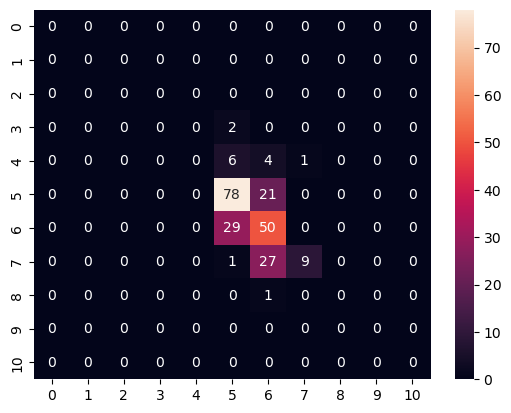

In [69]:
# visualise the SVC model in a nice picture
sns.heatmap(svc_conf_matrix, annot=True, fmt='g')
plt.show()

In [70]:
# train the NuSVC model
print("**** TESTING Nu-Support Vector Classification ****")

from sklearn.svm import NuSVC

nusvc_model = NuSVC(nu=0.015)
nusvc_model.fit(x_train, y_train)

# now test the fitness with the test subset
nusvc_y_predict = svc_model.predict(x_test)

# visualise it
print("x: predictions, y: labels")
nu_cm = np.array(confusion_matrix(y_test, nusvc_y_predict, labels=[0,1,2,3,4,5,6,7,8,9,10]))
nu_conf_matrix = pd.DataFrame(nu_cm)
print(nu_conf_matrix)

**** TESTING Nu-Support Vector Classification ****
x: predictions, y: labels
    0   1   2   3   4   5   6   7   8   9   10
0    0   0   0   0   0   0   0   0   0   0   0
1    0   0   0   0   0   0   0   0   0   0   0
2    0   0   0   0   0   0   0   0   0   0   0
3    0   0   0   0   0   2   0   0   0   0   0
4    0   0   0   0   0   6   4   1   0   0   0
5    0   0   0   0   0  78  21   0   0   0   0
6    0   0   0   0   0  29  50   0   0   0   0
7    0   0   0   0   0   1  27   9   0   0   0
8    0   0   0   0   0   0   1   0   0   0   0
9    0   0   0   0   0   0   0   0   0   0   0
10   0   0   0   0   0   0   0   0   0   0   0


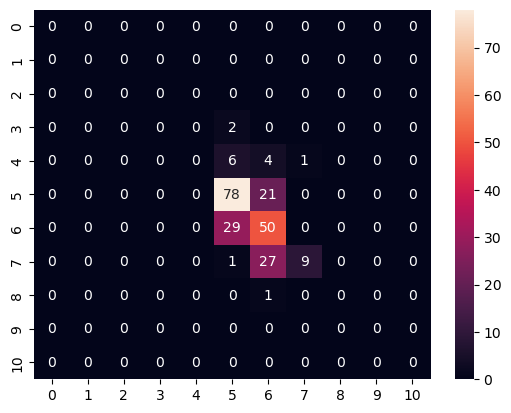

In [71]:
# visualise the NuSVC model in a nice picture
sns.heatmap(nu_conf_matrix, annot=True, fmt='g')
plt.show()

In [72]:
type(y_test)

numpy.ndarray

In [73]:
# train the SVR model
print("**** TESTING C-Support Vector Regression ****")

from sklearn.svm import SVR

svr_model = SVR(kernel="rbf")
svr_model.fit(x_train, y_train)

# now test the fitness with the test subset
svr_y_predict = svr_model.predict(x_test)

**** TESTING C-Support Vector Regression ****


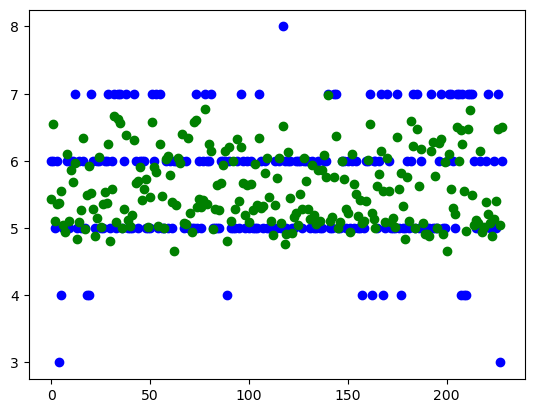

In [74]:
# visualise it
plt.scatter(range(0, len(y_test)), y_test, color = 'blue')
plt.scatter(range(0, len(y_test)), svr_y_predict, color = 'green')

What else is there to do?

* improve visualisations
* experiment with model settings
* try different train/test sizes